In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd D:\College\Graduation\CV

D:\College\Graduation\CV


In [69]:
img.shape

(480, 480, 3)

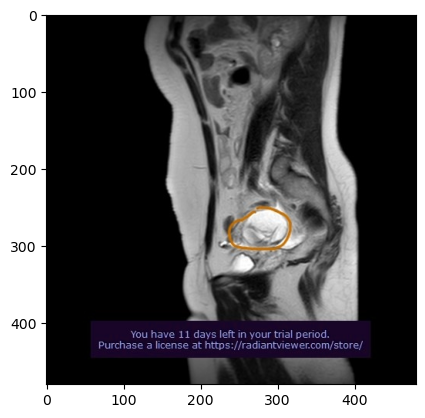

In [8]:
plt.imshow(img)
plt.show()

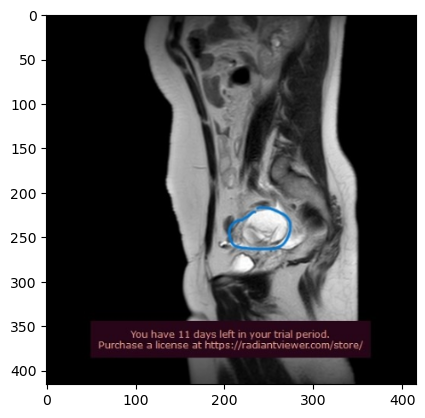

In [19]:
plt.imshow(img_size)
plt.show()

In [27]:
# Function to do nothing when the trackbar is used (placeholder)
def nothing(x):
    pass

# Load the image
image_path = 'task_image.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a window to display the results
cv2.namedWindow('Trackbars')

# Create trackbars for adjusting the HSV range
cv2.createTrackbar('H Min', 'Trackbars', 0, 179, nothing) 
cv2.createTrackbar('H Max', 'Trackbars', 179, 179, nothing)
cv2.createTrackbar('S Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('S Max', 'Trackbars', 255, 255, nothing)
cv2.createTrackbar('V Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('V Max', 'Trackbars', 255, 255, nothing)

while True:
    # Get the current positions of the trackbars
    h_min = cv2.getTrackbarPos('H Min', 'Trackbars')
    h_max = cv2.getTrackbarPos('H Max', 'Trackbars')
    s_min = cv2.getTrackbarPos('S Min', 'Trackbars')
    s_max = cv2.getTrackbarPos('S Max', 'Trackbars')
    v_min = cv2.getTrackbarPos('V Min', 'Trackbars')
    v_max = cv2.getTrackbarPos('V Max', 'Trackbars')
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    # Create a mask based on the current HSV range
    lower_hsv = np.array([h_min, s_min, v_min])
    upper_hsv = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Apply the mask to get the result
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display the original, mask, and result
    cv2.imshow('Original Image', image)
    cv2.imshow('Mask', mask)
    cv2.imshow('Filtered Image', result)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cv2.destroyAllWindows()


0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 255 0 255
0 179 0 25

In [72]:
lower_hsv = np.array([40, 158, 118])
upper_hsv = np.array([125 , 255 , 255])
mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)
# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create a new blank mask of the same size as the original mask
filled_mask = np.zeros_like(mask)

# Draw the contours in the new mask
cv2.drawContours(filled_mask, contours, -1, 255, thickness=cv2.FILLED)

# Apply dilation to fill in the shapes
kernel = np.ones((5, 5), np.uint8)  # Define a kernel for dilation
filled_mask = cv2.dilate(filled_mask, kernel, iterations=1)  # Dilation to fill the shapes

# Convert the filled mask (single-channel) to a 3-channel image (BGR)
filled_mask_colored = cv2.cvtColor(filled_mask, cv2.COLOR_GRAY2BGR)

# Concatenate the original image and the filled mask using np.concatenate
concatenated_image = np.concatenate((image, filled_mask_colored), axis=1)

# Display the original image and the filled mask
cv2.imshow('Original and Filled Mask Concatenated', concatenated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
concatenated_image.shape

(480, 960, 3)